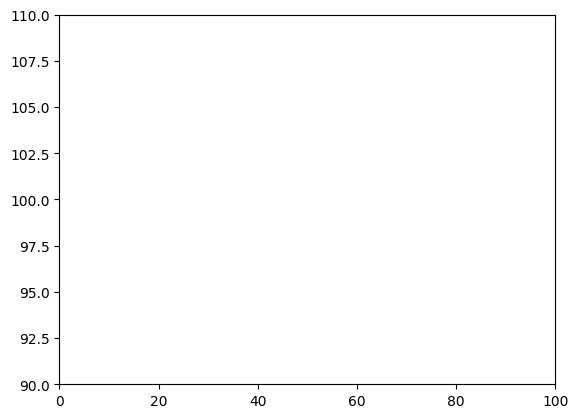

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

class Candle:
    def __init__(self, open_price, high, low, close):
        self.open = open_price
        self.high = high
        self.low = low
        self.close = close

candles = []
current_price = 100
candles.append(Candle(current_price, current_price, current_price, current_price))

volatility = 0.5  # Определяем волатильность
stop_simulation = False

fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(90, 110)

def on_move(event):
    if event.inaxes and not stop_simulation:
        global current_price
        # Определение нового положения цены на основе координаты мыши и волатильности
        new_price = event.ydata + np.random.uniform(-volatility, volatility)
        current_price = new_price
        open_price = candles[-1].close
        high = max(open_price, current_price)
        low = min(open_price, current_price)
        close = current_price
        candles.append(Candle(open_price, high, low, close))
        if len(candles) > 100:  # Ограничиваем количество свечей
            candles.pop(0)

def on_click(event):
    global stop_simulation
    if event.button == 3:  # Правая кнопка мыши
        stop_simulation = True

def animate(i):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(min([c.low for c in candles]) - 5, max([c.high for c in candles]) + 5)

    for j, candle in enumerate(candles):
        color = 'green' if candle.close >= candle.open else 'red'
        ax.plot([j, j], [candle.low, candle.high], color=color)
        ax.plot([j - 0.1, j + 0.1], [candle.open, candle.open], color=color)
        ax.plot([j - 0.1, j + 0.1], [candle.close, candle.close], color=color)

fig.canvas.mpl_connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)
ani = FuncAnimation(fig, animate, frames=200, repeat=False)
plt.show()
